# Word to Vector

![](https://lena-voita.github.io/resources/lectures/word_emb/lookup_table.gif)

**yap**, its basically how we turn word to numbers, so computer will understand it.

![](https://miro.medium.com/v2/resize:fit:1372/format:webp/1*YXy_Txtmtttw85Vv05JdRQ.jpeg)

that is how basically text are converted into vectors.

however, counting or giving each word a number didnt do anything, the word has meaning, and this is what we want computer to understand.

how?, simply just giving the weight to word to track how valueable a word is.

we often use TF-IDF (Term Frequency-Inverse Term Frequency), will weighting a word to define important feature within text or document or corpus.

More weight means more important, for example how many word appear in corpus, more appear more weight more important (Term Frequency).

ex : 

Corpus : "Dennis loves programming, he programs all day, he will be a world class programmer one day"

tokenized + count : program(3), day(2), .. ,else(1).

TF = (number of times word appear in corpus)/(total number of words appear in corpus).

however, if another corpus have a lot of same word appear, that word will less meaning and cant be a feature.

so solve it, we use IDF (Inverse Term Freqency), what you expect?, its basically a reverse, it measure how much information the word provides, weather the term is common(TF High) or rare(TF Low) accross all corpus.

IDF = log(total number of corpus)/(number of corpus with the term t in it).

so.. TF-IDF = TF*IDF. 

basically using TF-IDF can get most important feature from corpus with weight.

lets see the different between just count and TF-IDF Vectorizer.

![](https://miro.medium.com/v2/resize:fit:1210/format:webp/1*-aZMvSiEXTbxIpHcvnIINg.jpeg)

TF-IDF will give us value of a word based on how important a word is in our corpuses. for example also is meaningless when we see corpus 1, but it is very valueable or informative in second corpus.

blablabla, we need the code jimmy. action is number 1.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample corpus
docs = ["love programming", "programming also love"]

# Create TF-IDF vectorizer
vectorizer1 = TfidfVectorizer(sublinear_tf=True, max_df=1.0)

# Fit and transform the documents
bow1 = vectorizer1.fit_transform(docs)

# Get feature names
feature_names = vectorizer1.get_feature_names_out()

# Create index for rows
corpus_index = [n for n in docs]

# Create dataframe
df = pd.DataFrame(bow1.todense(), index=corpus_index, columns=feature_names)
df

,also,love,programming
love programming,0.000000,0.707107,0.707107
programming also love,0.704909,0.501549,0.501549


terminology alert, if we take one word as a feature thats called unigram. if we take two word as a feature, thats called Bigram, and if three its Trigram. you see the pattern, but lets representing it as n-gram.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample corpus
docs = ["love programming", "programming also love"]

# TF-IDF with both unigrams and bigrams
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=1.0, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(docs)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Build DataFrame
df = pd.DataFrame(tfidf_matrix.todense(), index=docs, columns=feature_names)
print(df)

                           also  also love      love  love programming  \
love programming       0.000000   0.000000  0.501549          0.704909   
programming also love  0.499221   0.499221  0.355200          0.000000   

                       programming  programming also  
love programming          0.501549          0.000000  
programming also love     0.355200          0.499221  


**The point is** the value of a token or feature or bigram or unigram is representing how important that feature is in a corpus. since tf telling how often it appears in a corpus and idf tells how unique it is accross all corpuses. meaning if the value is high that feature or token is frequent in that corpus and rare in other.

This value make more sense or add much meaning than just counting it. that table is called sparse matrix. now this matrix is what we give model to train with. Sparse Matrix = X_Train (Input).

Sounds like a solution right?. however, there is a problem, say we have 

c1 : the movie is great.

c2 : goo is the movie.

with TF-IDF the value of a word is all the same accross corpus, even if it is not make any sense. the meaning isnt defined greatly here.

The solution is using word2vec. same goal, we want to representing a word into numerical values that computer can understand 'well'.

Lets start with using 'one-hot' method to convert word into sparse representation. we will give value a word as 1 and else will 0 for representing that word is important. now say for our c1, it will have 4 vector size. but how about if our corpus is a dictionary which have 10000 word, how tf we are gonna compute that 10000 vector size.

Word2vec again comes to take care mainly two things here

1. convert this high dimentional vector (10000 sized) into lower dimentional vector size (ex. 100). this conversion is called word embedding.

2. Mantains the word value importance or context (meaning). Meaning can be defined within two methods:

    - Bag of Words, predict a word based on surrounding words. ex 'i love pizza' -> x = ['i', 'love'] y = ['pizza'].
    - Skip-Gram, take a word and predict the surrounding. ex 'i love pizza' -> x = ['love'], y = ['i', 'pizza'].

Now, how word2vec works?
1. Take a neural nets with one input layer, one hidden layer and one output layer.
   
- ![](https://s3.eu-west-1.amazonaws.com/redsys-prod/articles/e375fac2371981c259ad7979/images/image-2.png)

see, we windowing 4 word and we try to predict the nearby word. 

corpus = '.... spike with pain and music is my aeroplane ....'

4 window = 'music is my aeroplane'

x = ['aeroplane']

y = ['music', 'is', 'my']

the output is called word embeddings. and this representing how computer know the context when we talk about aeroplane, since it can predict what words correlated to aeroplane.

one last note is since the hidden layer and output layer has so much weights in it, when we try to calculate the xi = 1, the other xi = 0 will be dropout and the neuron didnt active meaning the weight didnt being calculate.

Lets Recap, word2vec is a neural network training for all the word in our dictionary to get weight or parameter or vectors. it will have a word embeddings for every word in the dicitonary or corpus.

well, with this we can get similar vector for plural word, or has similar meaning, for example 'great', 'good', 'awesome' ... from a really big corpus. this is how we want to make computer understand that word has same meaning or context. imagine if every word has a correlation one another, it will has meaning with more contextual.

okey thats all, whats next, hmm....

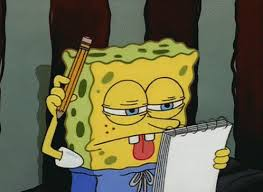

oh yeah, the code, lets end the bla bla and implement what we already learn

In [24]:
import pandas as pd

df = pd.read_csv('corona.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [25]:
import re

def normalize_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|<url>', '', text)  # hapus url
    text = re.sub(r'[^a-z\s]', '', text)  # hapus simbol kecuali huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

df = df['OriginalTweet'][:10]
normalized_sentences = [normalize_text(text) for text in df]
normalized_sentences[:5]

['trending new yorkers encounter empty supermarket shelves pictured wegmans in brooklyn soldout online grocers foodkick maxdelivery as coronavirusfearing shoppers stock up',
 'when i couldnt find hand sanitizer at fred meyer i turned to amazon but for a pack of purellcheck out how coronavirus concerns are driving up prices',
 'find out how you can protect yourself and loved ones from coronavirus',
 'panic buying hits newyork city as anxious shoppers stock up on foodampmedical supplies after healthcare worker in her s becomes bigapple st confirmed coronavirus patient or a bloomberg staged event qanon qanon qanon election cdc',
 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder the next everyone buying up toilet paper']

In [27]:
import collections

# sentences to words and count
words = " ".join(normalized_sentences).split()
count = collections.Counter(words).most_common()

print("Word Count : ", count[:5])

Word Count :  [('the', 9), ('a', 7), ('coronavirus', 7), ('in', 5), ('i', 5)]


In [30]:
# build dictionaries

unique_words = [i[0] for i in count]
dic = {w : i for i, w in enumerate(unique_words)}
win_size = len(dic)

dic

{'the': 0,
 'a': 1,
 'coronavirus': 2,
 'in': 3,
 'i': 4,
 'you': 5,
 'up': 6,
 'for': 7,
 'of': 8,
 'last': 9,
 'as': 10,
 'hand': 11,
 'sanitizer': 12,
 'at': 13,
 'out': 14,
 'how': 15,
 'are': 16,
 'prices': 17,
 'buying': 18,
 'qanon': 19,
 'covid': 20,
 'do': 21,
 'is': 22,
 'supermarket': 23,
 'shoppers': 24,
 'stock': 25,
 'when': 26,
 'find': 27,
 'to': 28,
 'or': 29,
 'everyone': 30,
 'masks': 31,
 'have': 32,
 'amp': 33,
 'should': 34,
 'no': 35,
 'pharmacies': 36,
 'trending': 37,
 'new': 38,
 'yorkers': 39,
 'encounter': 40,
 'empty': 41,
 'shelves': 42,
 'pictured': 43,
 'wegmans': 44,
 'brooklyn': 45,
 'soldout': 46,
 'online': 47,
 'grocers': 48,
 'foodkick': 49,
 'maxdelivery': 50,
 'coronavirusfearing': 51,
 'couldnt': 52,
 'fred': 53,
 'meyer': 54,
 'turned': 55,
 'amazon': 56,
 'but': 57,
 'pack': 58,
 'purellcheck': 59,
 'concerns': 60,
 'driving': 61,
 'can': 62,
 'protect': 63,
 'yourself': 64,
 'and': 65,
 'loved': 66,
 'ones': 67,
 'from': 68,
 'panic': 69,
 'h

In [34]:
data = [dic[word] for word in words]
print('Sample Data : ', data[:10], words[:10])

Sample Data :  [37, 38, 39, 40, 41, 23, 42, 43, 44, 3] ['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'in']


**Now lets start using word2vec ... we can use bag of words and skip gram**

In [41]:
cbow = []

for i in range(1, len(data)-1):
    cbow.append([[data[i-1], data[i+1]], data[i]])


print("Context pairs ranks ids: ", cbow[:5])
print()

cbow_words = []

for i in range(1, len(words)-1):
    cbow_words.append([[words[i-1], words[i+1]], words[i]])

print('Context pairs words : ', cbow_words[:5])

Context pairs ranks ids:  [[[37, 39], 38], [[38, 40], 39], [[39, 41], 40], [[40, 23], 41], [[41, 42], 23]]

Context pairs words :  [[['trending', 'yorkers'], 'new'], [['new', 'encounter'], 'yorkers'], [['yorkers', 'empty'], 'encounter'], [['encounter', 'supermarket'], 'empty'], [['empty', 'shelves'], 'supermarket']]


In [45]:
skip_gram = []

for _ in cbow:
    skip_gram.append([_[1], _[0][0]])
    skip_gram.append([_[1], _[0][1]])

print('skip-gram pairs : ', skip_gram[:5])
print()

skip_gram_words = []
for _ in cbow_words:
    skip_gram_words.append([_[1], _[0][0]])
    skip_gram_words.append([_[1], _[0][1]])

print('skip-gram pairs words : ', skip_gram_words[:5])

skip-gram pairs :  [[38, 37], [38, 39], [39, 38], [39, 40], [40, 39]]

skip-gram pairs words :  [['new', 'trending'], ['new', 'yorkers'], ['yorkers', 'new'], ['yorkers', 'encounter'], ['encounter', 'yorkers']]


**now lets use it as traning datasets....**

In [53]:
import numpy as np

def get_batch(size):
    assert size < len(skip_gram)
    X = []
    Y = []
    rdm = np.random.choice(range(len(skip_gram)), size, replace=False)

    for r in rdm:
        X.append(skip_gram[r][0])
        Y.append([skip_gram[r][1]])
    return X, Y

# Only call once
X_batch, Y_batch = get_batch(3)

# Print (x, y) IDs
print("Batches (x, y):", list(zip(X_batch, Y_batch)))
print()

# Build reverse dictionary
id_to_word = {i: w for w, i in dic.items()}

# Print words
print("Batches with words:")
for x, y in zip(X_batch, Y_batch):
    print(f"Center: {id_to_word[x]} ({x}) -> Context: {id_to_word[y[0]]} ({y[0]})")

Batches (x, y): [(92, [91]), (18, [103]), (51, [24])]

Batches with words:
Center: toiletpaper (92) -> Context: cdc (91)
Center: buying (18) -> Context: baby (103)
Center: coronavirusfearing (51) -> Context: shoppers (24)


**Next is train using neural network to understand context (word2vec)**

In [67]:
import tensorflow as tf

vocab_size = len(dic)
embedding_size = 2
num_sampled = 15
batch_size = 20
num_steps = 10000

# Embedding + output layer
embedding = tf.Variable(tf.random.uniform([vocab_size, embedding_size], -1.0, 1.0))
nce_weights = tf.Variable(tf.random.truncated_normal([vocab_size, embedding_size], stddev=1.0 / tf.math.sqrt(float(embedding_size))))
nce_biases = tf.Variable(tf.zeros([vocab_size]))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training loop
for step in range(1, num_steps + 1):
    X_batch, Y_batch = get_batch(batch_size)
    X_batch_tensor = tf.constant(X_batch, dtype=tf.int32)
    Y_batch_tensor = tf.constant(Y_batch, dtype=tf.int32)

    with tf.GradientTape() as tape:
        embedded = tf.nn.embedding_lookup(embedding, X_batch_tensor)
        loss = tf.reduce_mean(
            tf.nn.nce_loss(
                weights=nce_weights,
                biases=nce_biases,
                labels=Y_batch_tensor,
                inputs=embedded,
                num_sampled=num_sampled,
                num_classes=vocab_size
            )
        )
    grads = tape.gradient(loss, [embedding, nce_weights, nce_biases])
    optimizer.apply_gradients(zip(grads, [embedding, nce_weights, nce_biases]))

    # Print every 1000 steps
    if step % 1000 == 0 or step == 1:
        print(f"Step {step:5d}, Loss: {loss.numpy():.4f}")

Step     1, Loss: 29.8830
Step  1000, Loss: 3.2020
Step  2000, Loss: 3.2683
Step  3000, Loss: 3.6798
Step  4000, Loss: 3.2263
Step  5000, Loss: 3.1981
Step  6000, Loss: 2.8149
Step  7000, Loss: 2.9299
Step  8000, Loss: 2.6200
Step  9000, Loss: 2.5619
Step 10000, Loss: 2.6296


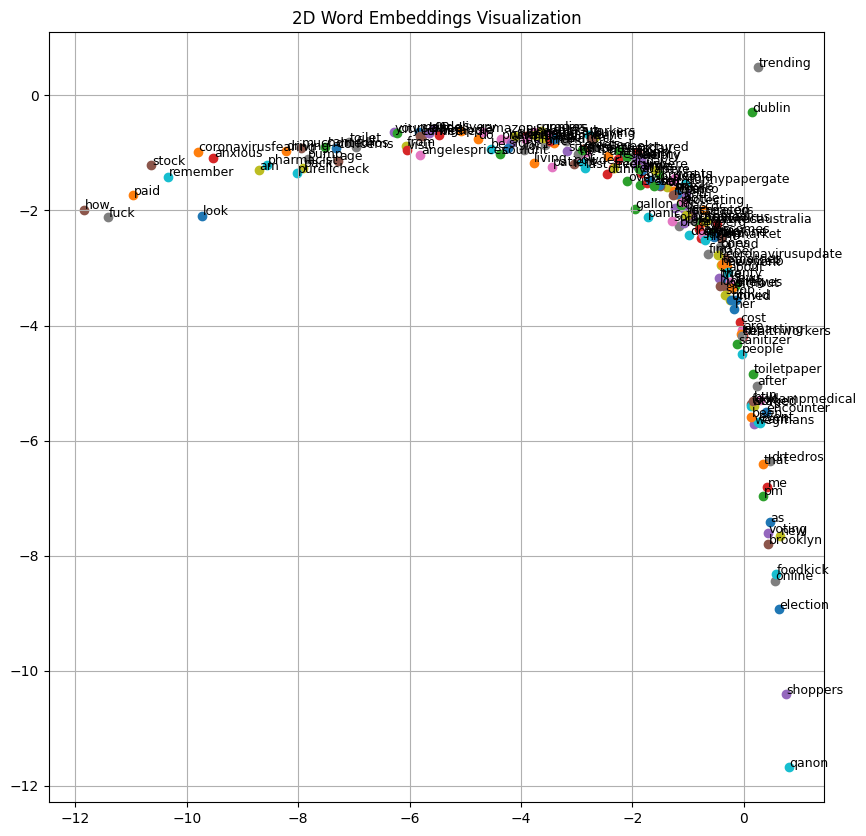

In [68]:
import matplotlib.pyplot as plt

# Retrieve trained embeddings
embeddings = embedding.numpy()

# Plot settings
plt.figure(figsize=(10, 10))
for word, idx in dic.items():
    x, y = embeddings[idx]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)

plt.title("2D Word Embeddings Visualization")
plt.grid(True)
plt.show()

**prediciton**, lets test if we pust out corpus 

corpus : "Coronavirus is ____"

We want it to return related/similar words like: dangerous, deadly, serious, etc.

In [69]:
def get_similar_words(word, top_n=5):
    if word not in dic:
        print(f"'{word}' not in vocabulary.")
        return
    
    word_id = dic[word]
    word_vec = embedding.numpy()[word_id]
    
    # Normalize embeddings
    norm = np.linalg.norm(embedding.numpy(), axis=1)
    norm_embeddings = embedding.numpy() / norm[:, np.newaxis]
    
    # Normalize the word vector
    word_vec_norm = word_vec / np.linalg.norm(word_vec)
    
    # Compute cosine similarity
    similarity = np.dot(norm_embeddings, word_vec_norm)

    # Get top N most similar word indices
    top_n_ids = similarity.argsort()[-top_n-1:][::-1]  # exclude itself later
    
    print(f"Top {top_n} words similar to '{word}':")
    for i in top_n_ids:
        if i != word_id:  # exclude the input word itself
            print(f"{i}: {id_to_word[i]} (score: {similarity[i]:.4f})")

In [74]:
get_similar_words("fuck", top_n=5)
get_similar_words("deadly", top_n=5)

Top 5 words similar to 'fuck':
78: healthcare (score: 1.0000)
26: when (score: 1.0000)
3: in (score: 1.0000)
106: next (score: 1.0000)
116: angelesprices (score: 1.0000)
'deadly' not in vocabulary.


**Now hold on a sec**, from graph we saw anxious is nearby with coronavirus, but it didnt predicted. we can check if it is a word in our dic.

In [77]:
print("anxious" in dc)

True


**and then**, whats the point of anxious word with coronavirus

In [76]:
# Show top 10 most similar words to 'coronavirus'
get_similar_words("coronavirus", top_n=10)

# See similarity score of 'anxious' directly (if it exists)
if "anxious" in dic:
    corona_id = dic["coronavirus"]
    anxious_id = dic["anxious"]
    corona_vec = embedding.numpy()[corona_id]
    anxious_vec = embedding.numpy()[anxious_id]

    sim = np.dot(corona_vec / np.linalg.norm(corona_vec),
                 anxious_vec / np.linalg.norm(anxious_vec))

    print(f"Similarity between 'coronavirus' and 'anxious': {sim:.4f}")
else:
    print("'anxious' not in vocabulary.")

Top 10 words similar to 'coronavirus':
119: down (score: 0.9999)
91: cdc (score: 0.9998)
57: but (score: 0.9995)
173: few (score: 0.9994)
141: trebled (score: 0.9988)
84: st (score: 0.9984)
188: special (score: 0.9981)
23: supermarket (score: 0.9976)
33: amp (score: 0.9974)
176: my (score: 0.9972)
Similarity between 'coronavirus' and 'anxious': 0.4606


we can see, its related, but has lower score, which is being low ranked. and not showed as importance as top 10 word correlated which has score very high.

**lets recab**, first a word must be numerical representation which we can labelled it as index count.

then, since it cant has a meaning full or contextual meaning. we need to vectorize it, meaning a word being correlated one and anothe.

this vectorize method called word embedding, and here, we use word2vec.

word2vec mainly has 2 method. bag of word(surrounding word to predict center word) and step-gram(use one word to predict surrounding word).

we can use neural network with input, hidden and output layer multiperceptron architecture. here we can give input that word and make an optimal weight to predict surrounding word nearby that text.

we can more easily see in the graph, word with has same meaning will be nearby, so basically when we try to take one word, model can predict the next word that is probabily fit to our word context.

for example coronavirus word, whats possible next word is being defined in neural network, which is the output of that neural network is a vectorized of that word to corresponding or next or related words. for example deadly etc.